In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# filter warning messages
import warnings
warnings.filterwarnings('ignore')

credit risk analysis of a brazilian digital bank Nubank. We will build a model to analyse and predict clients meeting there contractual obligations. 

In [29]:
path = '../input/nubank/acquisition_train.csv'
df_credit = pd.read_csv(path)

In [30]:
df_credit

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,696cb747-1159-0a29-6731-8c52c6c42f5d,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,...,730,"(-22.486891256430695, -44.909010639017616)",Facebook,768-5074915,73417.0,BR-GO,52148,"{'tags': ['n1', 'n7', 'n4', 'n0']}",Mozilla/5.0 (Linux; Android 6.0.1; SM-G920V Bu...,NaN
44996,92cd9b1a-9a8e-43ad-5d96-8e999128b472,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,NaN,...,28,"(-12.881449687799003, -46.43545330884514)",Waiting-list,772-3517810,26246.0,BR-RO,46084,"{'tags': ['n11', 'n5', 'n12']}",Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN
44997,febdd174-cf18-0be1-feb8-38399dd67d9e,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,NaN,...,940,"(-23.888982131800983, -50.645313285616645)",Waiting-list,334-9885724,101252.0,BR-SP,30570,"{'tags': ['dfa', 'c55', 'pro+aty']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,NaN
44998,a0a5a872-6165-b939-b711-37d045a0b5a8,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.0,100.476090,0.214697,86.759074,0.37,NaN,...,459,"(-5.14769885524928, -37.98386842511541)",Instagram,238-9568414,129844.0,BR-SP,12742,"{'tags': ['n9', 'n2']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN


In [31]:
print('Number of rows: ', df_credit.shape[0])
print('Number of columns: ', df_credit.shape[1])

Number of rows:  45000
Number of columns:  43


In [32]:
# data frame summary
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [33]:

# percentage of missing values per feature
print((df_credit.isnull().sum() * 100 / df_credit.shape[0]).sort_values(ascending=False))

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

In [34]:
df_credit.dropna(subset=['target_default'], inplace=True)

In [35]:
# drop the column "target_fraud"
df_credit.drop('target_fraud', axis=1, inplace=True)

In [36]:
# number of unique observations per column
df_credit.nunique().sort_values()

channel                                                 1
external_data_provider_credit_checks_last_2_year        1
last_borrowed_in_months                                 2
target_default                                          2
facebook_profile                                        2
external_data_provider_credit_checks_last_year          2
external_data_provider_credit_checks_last_month         4
real_state                                              5
n_defaulted_loans                                       5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts                                             44
state         

In [37]:

df_credit.drop(labels=['channel', 'external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)

In [38]:

df_credit.drop(labels=['email', 'reason', 'zip', 'job_name', 'external_data_provider_first_name', 'lat_lon',
                       'shipping_zip_code', 'user_agent', 'profile_tags', 'marketing_channel',
                       'profile_phone_number', 'application_time_applied', 'ids'], axis=1, inplace=True)

In [39]:
df_credit.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,28632.000000,4.174100e+04,17276.000000,41606.000000,41729.000000,41741.000000,30818.000000,41741.000000,41741.000000,27720.000000,39656.000000,41741.000000,41741.0
mean,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,33877.220453,7.108012e+04,35.192174,0.076696,0.004625,10.639108,11.023882,247.748545,1.504396,0.504185,12.731188,500.491771,inf
std,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,36141.985884,5.225978e+04,21.629577,0.274820,0.080157,4.588175,4.596036,146.326172,1.114207,0.499992,125.711218,287.993121,NaN
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,403.0
25%,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,9975.000000,4.401958e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,1.000000,0.000000,11.000000,252.000000,50910.0
50%,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,25213.000000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,2.000000,1.000000,27.000000,502.000000,101623.0
75%,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,46492.500000,8.503289e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,2.000000,1.000000,43.000000,747.000000,151248.0
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,inf


In [40]:

# count of "inf" values in "reported_income"
np.isinf(df_credit['reported_income']).sum()

66

In [41]:
# count of values = -999 in "external_data_provider_email_seen_before"
df_credit.loc[df_credit['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'].value_counts()

-999.0    591
Name: external_data_provider_email_seen_before, dtype: int64

In [42]:
# replace "inf" values with "nan"
df_credit['reported_income'] = df_credit['reported_income'].replace(np.inf, np.nan)

# replace "-999" values with "nan"
df_credit.loc[df_credit['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'] = np.nan

In [43]:
df_credit_numerical = df_credit[['score_3', 'risk_rate', 'last_amount_borrowed', 
                                 'last_borrowed_in_months', 'credit_limit', 'income', 'ok_since', 
                                 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 
                                 'external_data_provider_email_seen_before']]

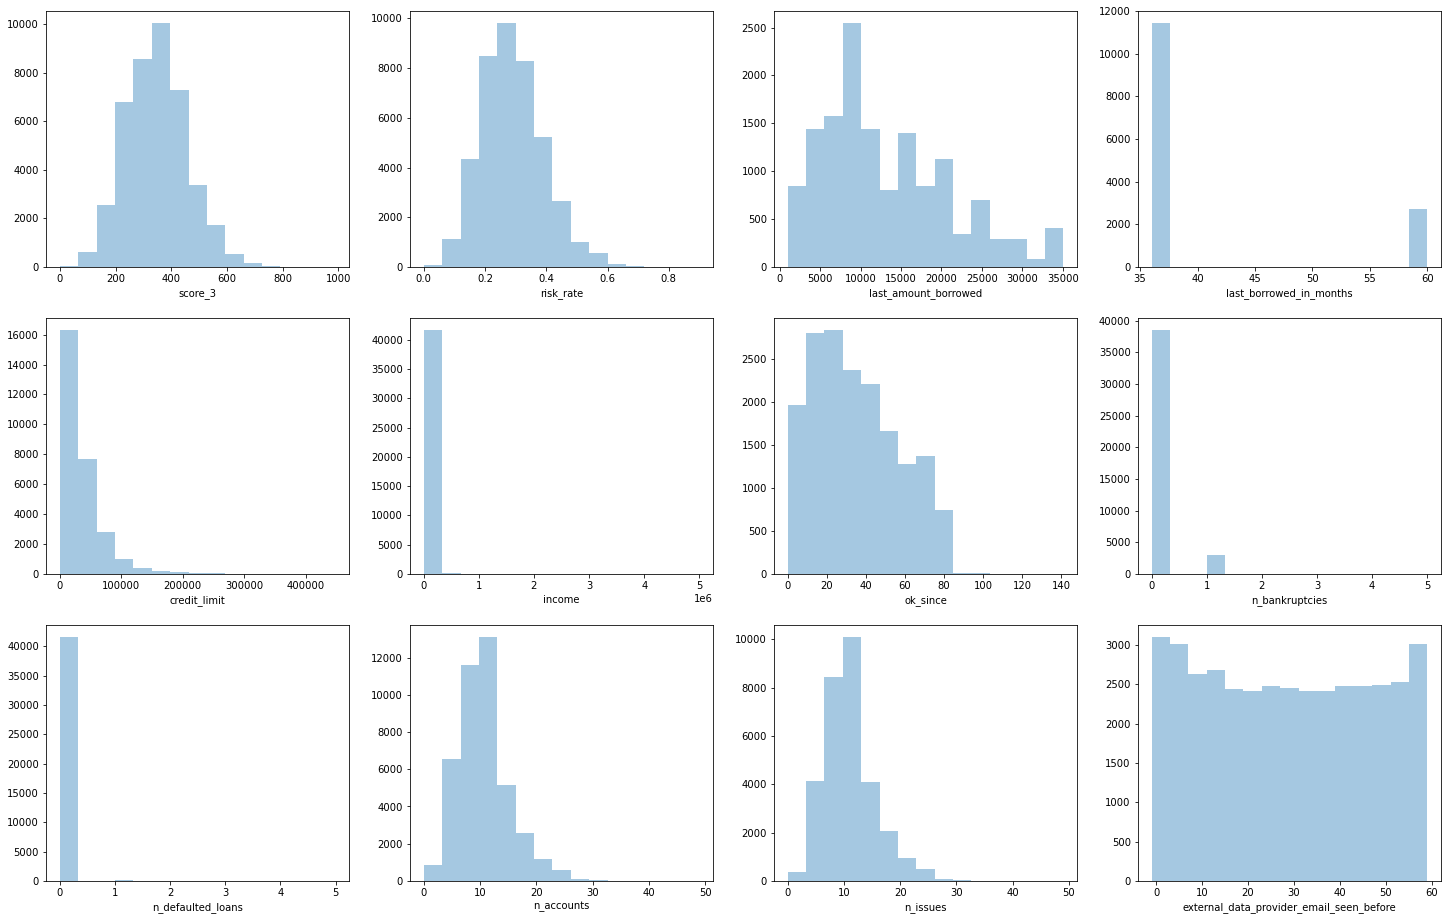

In [44]:
nrows = 3
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 16))

r = 0
c = 0

for i in df_credit_numerical:
  sns.distplot(df_credit_numerical[i], bins=15,kde=False, ax=ax[r][c])
  if c == ncols - 1:
    r += 1
    c = 0
  else:
    c += 1

In [45]:
df_credit_num = df_credit.select_dtypes(exclude='object').columns
df_credit_cat = df_credit.select_dtypes(include='object').columns

# fill missing values for "last_amount_borrowed", "last_borrowed_in_months" and "n_issues"
df_credit['last_amount_borrowed'].fillna(value=0, inplace=True)
df_credit['last_borrowed_in_months'].fillna(value=0, inplace=True)
df_credit['n_issues'].fillna(value=0, inplace=True)

# fill missing values for numerical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_credit.loc[:, df_credit_num])
df_credit.loc[:, df_credit_num] = imputer.transform(df_credit.loc[:, df_credit_num])

# fill missing values for categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_credit.loc[:, df_credit_cat])
df_credit.loc[:, df_credit_cat] = imputer.transform(df_credit.loc[:, df_credit_cat])

In [46]:
df_credit.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

In [47]:
bin_var = df_credit.nunique()[df_credit.nunique() == 2].keys().tolist()
num_var = [col for col in df_credit.select_dtypes(['int', 'float']).columns.tolist() if col not in bin_var]
cat_var = [col for col in df_credit.select_dtypes(['object']).columns.tolist() if col not in bin_var]

df_credit_encoded = df_credit.copy()

# label encoding for the binary variables
le = LabelEncoder()
for col in bin_var:
  df_credit_encoded[col] = le.fit_transform(df_credit_encoded[col])

# encoding with get_dummies for the categorical variables
df_credit_encoded = pd.get_dummies(df_credit_encoded, columns=cat_var)

df_credit_encoded.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,shipping_state_BR-PE,shipping_state_BR-PR,shipping_state_BR-RN,shipping_state_BR-RO,shipping_state_BR-RR,shipping_state_BR-RS,shipping_state_BR-SC,shipping_state_BR-SE,shipping_state_BR-SP,shipping_state_BR-TO
0,0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,...,0,0,0,0,0,0,0,0,0,0
1,0,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,...,0,0,0,0,0,1,0,0,0,0
2,1,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,65023.65,...,0,0,0,0,1,0,0,0,0,0
3,0,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,54591.0,68830.01,...,0,0,1,0,0,0,0,0,0,0
4,0,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,25213.0,60011.29,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# feature matrix
X = df_credit_encoded.drop('target_default', axis=1)

# target vector
y = df_credit_encoded['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

In [49]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# resample
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

In [50]:
def val_model(X, y, clf, show=True):
    """
    Apply cross-validation on the training set.

    # Arguments
        X: DataFrame containing the independent variables.
        y: Series containing the target vector.
        clf: Scikit-learn estimator instance.
        
    # Returns
        float, mean value of the cross-validation scores.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if show == True:
        print(f'Recall: {scores.mean()}, {scores.std()}')
    
    return scores.mean()

In [51]:
xgb = XGBClassifier()
lgb = LGBMClassifier()
cb = CatBoostClassifier()

model = []
recall = []

for clf in (xgb, lgb, cb):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, show=False))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

Learning rate set to 0.025026
0:	learn: 0.6900789	total: 6.92ms	remaining: 6.91s
1:	learn: 0.6870386	total: 13.4ms	remaining: 6.67s
2:	learn: 0.6843322	total: 19.7ms	remaining: 6.55s
3:	learn: 0.6820286	total: 26.2ms	remaining: 6.53s
4:	learn: 0.6795836	total: 32.5ms	remaining: 6.47s
5:	learn: 0.6772495	total: 38.8ms	remaining: 6.42s
6:	learn: 0.6751244	total: 45ms	remaining: 6.38s
7:	learn: 0.6731655	total: 51.1ms	remaining: 6.34s
8:	learn: 0.6712058	total: 57.3ms	remaining: 6.31s
9:	learn: 0.6694759	total: 63.7ms	remaining: 6.31s
10:	learn: 0.6676707	total: 70.1ms	remaining: 6.3s
11:	learn: 0.6662953	total: 76.3ms	remaining: 6.28s
12:	learn: 0.6644221	total: 82.6ms	remaining: 6.27s
13:	learn: 0.6631764	total: 88.9ms	remaining: 6.26s
14:	learn: 0.6616471	total: 95.3ms	remaining: 6.26s
15:	learn: 0.6598907	total: 102ms	remaining: 6.25s
16:	learn: 0.6583694	total: 108ms	remaining: 6.25s
17:	learn: 0.6570493	total: 115ms	remaining: 6.25s
18:	learn: 0.6558532	total: 121ms	remaining: 6.26s

176:	learn: 0.5959036	total: 1.19s	remaining: 5.53s
177:	learn: 0.5957592	total: 1.2s	remaining: 5.53s
178:	learn: 0.5954942	total: 1.2s	remaining: 5.53s
179:	learn: 0.5953607	total: 1.21s	remaining: 5.53s
180:	learn: 0.5950958	total: 1.22s	remaining: 5.53s
181:	learn: 0.5948450	total: 1.24s	remaining: 5.55s
182:	learn: 0.5945760	total: 1.24s	remaining: 5.55s
183:	learn: 0.5943672	total: 1.26s	remaining: 5.57s
184:	learn: 0.5942228	total: 1.27s	remaining: 5.58s
185:	learn: 0.5940835	total: 1.27s	remaining: 5.58s
186:	learn: 0.5938423	total: 1.28s	remaining: 5.58s
187:	learn: 0.5935929	total: 1.3s	remaining: 5.6s
188:	learn: 0.5933907	total: 1.31s	remaining: 5.61s
189:	learn: 0.5932666	total: 1.32s	remaining: 5.62s
190:	learn: 0.5930863	total: 1.32s	remaining: 5.62s
191:	learn: 0.5929054	total: 1.33s	remaining: 5.62s
192:	learn: 0.5926850	total: 1.34s	remaining: 5.62s
193:	learn: 0.5925163	total: 1.35s	remaining: 5.63s
194:	learn: 0.5923210	total: 1.36s	remaining: 5.64s
195:	learn: 0.59

339:	learn: 0.5658630	total: 2.38s	remaining: 4.61s
340:	learn: 0.5656470	total: 2.38s	remaining: 4.61s
341:	learn: 0.5654886	total: 2.39s	remaining: 4.6s
342:	learn: 0.5653096	total: 2.4s	remaining: 4.59s
343:	learn: 0.5651219	total: 2.4s	remaining: 4.58s
344:	learn: 0.5649182	total: 2.41s	remaining: 4.58s
345:	learn: 0.5647180	total: 2.42s	remaining: 4.57s
346:	learn: 0.5645583	total: 2.42s	remaining: 4.56s
347:	learn: 0.5643452	total: 2.43s	remaining: 4.55s
348:	learn: 0.5641151	total: 2.44s	remaining: 4.55s
349:	learn: 0.5638674	total: 2.44s	remaining: 4.54s
350:	learn: 0.5637046	total: 2.45s	remaining: 4.53s
351:	learn: 0.5635221	total: 2.46s	remaining: 4.52s
352:	learn: 0.5633455	total: 2.46s	remaining: 4.51s
353:	learn: 0.5631664	total: 2.47s	remaining: 4.51s
354:	learn: 0.5629938	total: 2.48s	remaining: 4.5s
355:	learn: 0.5628101	total: 2.48s	remaining: 4.49s
356:	learn: 0.5627048	total: 2.49s	remaining: 4.48s
357:	learn: 0.5626202	total: 2.5s	remaining: 4.48s
358:	learn: 0.562

516:	learn: 0.5296396	total: 3.57s	remaining: 3.34s
517:	learn: 0.5294288	total: 3.58s	remaining: 3.33s
518:	learn: 0.5292358	total: 3.59s	remaining: 3.33s
519:	learn: 0.5290407	total: 3.59s	remaining: 3.32s
520:	learn: 0.5288848	total: 3.6s	remaining: 3.31s
521:	learn: 0.5286479	total: 3.61s	remaining: 3.3s
522:	learn: 0.5284634	total: 3.61s	remaining: 3.3s
523:	learn: 0.5282678	total: 3.62s	remaining: 3.29s
524:	learn: 0.5280563	total: 3.63s	remaining: 3.28s
525:	learn: 0.5279115	total: 3.63s	remaining: 3.27s
526:	learn: 0.5276627	total: 3.64s	remaining: 3.27s
527:	learn: 0.5274306	total: 3.65s	remaining: 3.26s
528:	learn: 0.5271959	total: 3.65s	remaining: 3.25s
529:	learn: 0.5269712	total: 3.66s	remaining: 3.25s
530:	learn: 0.5268049	total: 3.67s	remaining: 3.24s
531:	learn: 0.5265995	total: 3.67s	remaining: 3.23s
532:	learn: 0.5263994	total: 3.68s	remaining: 3.22s
533:	learn: 0.5262168	total: 3.69s	remaining: 3.22s
534:	learn: 0.5260974	total: 3.69s	remaining: 3.21s
535:	learn: 0.5

690:	learn: 0.4962952	total: 4.76s	remaining: 2.13s
691:	learn: 0.4960309	total: 4.77s	remaining: 2.12s
692:	learn: 0.4958253	total: 4.77s	remaining: 2.11s
693:	learn: 0.4957150	total: 4.78s	remaining: 2.11s
694:	learn: 0.4955328	total: 4.79s	remaining: 2.1s
695:	learn: 0.4953704	total: 4.79s	remaining: 2.09s
696:	learn: 0.4952249	total: 4.8s	remaining: 2.09s
697:	learn: 0.4950766	total: 4.81s	remaining: 2.08s
698:	learn: 0.4949154	total: 4.81s	remaining: 2.07s
699:	learn: 0.4947285	total: 4.82s	remaining: 2.06s
700:	learn: 0.4945138	total: 4.83s	remaining: 2.06s
701:	learn: 0.4943591	total: 4.83s	remaining: 2.05s
702:	learn: 0.4941953	total: 4.84s	remaining: 2.04s
703:	learn: 0.4939623	total: 4.85s	remaining: 2.04s
704:	learn: 0.4937524	total: 4.85s	remaining: 2.03s
705:	learn: 0.4936394	total: 4.86s	remaining: 2.02s
706:	learn: 0.4934535	total: 4.87s	remaining: 2.02s
707:	learn: 0.4932038	total: 4.87s	remaining: 2.01s
708:	learn: 0.4930872	total: 4.88s	remaining: 2s
709:	learn: 0.492

863:	learn: 0.4665112	total: 5.95s	remaining: 936ms
864:	learn: 0.4663242	total: 5.96s	remaining: 929ms
865:	learn: 0.4660632	total: 5.96s	remaining: 923ms
866:	learn: 0.4659402	total: 5.97s	remaining: 916ms
867:	learn: 0.4657696	total: 5.97s	remaining: 909ms
868:	learn: 0.4656513	total: 5.98s	remaining: 902ms
869:	learn: 0.4655364	total: 5.99s	remaining: 895ms
870:	learn: 0.4654027	total: 5.99s	remaining: 888ms
871:	learn: 0.4651788	total: 6s	remaining: 881ms
872:	learn: 0.4650424	total: 6.01s	remaining: 874ms
873:	learn: 0.4649269	total: 6.01s	remaining: 867ms
874:	learn: 0.4648254	total: 6.02s	remaining: 860ms
875:	learn: 0.4646918	total: 6.03s	remaining: 853ms
876:	learn: 0.4645377	total: 6.03s	remaining: 846ms
877:	learn: 0.4644020	total: 6.04s	remaining: 839ms
878:	learn: 0.4642578	total: 6.05s	remaining: 832ms
879:	learn: 0.4640992	total: 6.05s	remaining: 825ms
880:	learn: 0.4639397	total: 6.06s	remaining: 818ms
881:	learn: 0.4637724	total: 6.07s	remaining: 812ms
882:	learn: 0.4

29:	learn: 0.6434897	total: 197ms	remaining: 6.38s
30:	learn: 0.6423875	total: 205ms	remaining: 6.41s
31:	learn: 0.6414091	total: 211ms	remaining: 6.38s
32:	learn: 0.6408203	total: 217ms	remaining: 6.36s
33:	learn: 0.6400960	total: 224ms	remaining: 6.35s
34:	learn: 0.6394170	total: 230ms	remaining: 6.33s
35:	learn: 0.6387186	total: 236ms	remaining: 6.31s
36:	learn: 0.6381775	total: 243ms	remaining: 6.33s
37:	learn: 0.6375600	total: 251ms	remaining: 6.36s
38:	learn: 0.6370018	total: 260ms	remaining: 6.41s
39:	learn: 0.6363872	total: 269ms	remaining: 6.44s
40:	learn: 0.6358692	total: 277ms	remaining: 6.48s
41:	learn: 0.6352060	total: 286ms	remaining: 6.52s
42:	learn: 0.6347674	total: 294ms	remaining: 6.55s
43:	learn: 0.6340205	total: 303ms	remaining: 6.58s
44:	learn: 0.6331452	total: 310ms	remaining: 6.58s
45:	learn: 0.6325548	total: 317ms	remaining: 6.57s
46:	learn: 0.6320485	total: 323ms	remaining: 6.56s
47:	learn: 0.6314843	total: 331ms	remaining: 6.55s
48:	learn: 0.6310206	total: 338

205:	learn: 0.5890102	total: 1.38s	remaining: 5.33s
206:	learn: 0.5887592	total: 1.39s	remaining: 5.32s
207:	learn: 0.5886190	total: 1.39s	remaining: 5.31s
208:	learn: 0.5883970	total: 1.4s	remaining: 5.3s
209:	learn: 0.5881831	total: 1.41s	remaining: 5.29s
210:	learn: 0.5879763	total: 1.41s	remaining: 5.29s
211:	learn: 0.5876210	total: 1.42s	remaining: 5.28s
212:	learn: 0.5874658	total: 1.43s	remaining: 5.27s
213:	learn: 0.5871970	total: 1.43s	remaining: 5.27s
214:	learn: 0.5870711	total: 1.44s	remaining: 5.26s
215:	learn: 0.5868295	total: 1.45s	remaining: 5.25s
216:	learn: 0.5866458	total: 1.45s	remaining: 5.25s
217:	learn: 0.5864645	total: 1.46s	remaining: 5.24s
218:	learn: 0.5862733	total: 1.47s	remaining: 5.24s
219:	learn: 0.5861077	total: 1.48s	remaining: 5.24s
220:	learn: 0.5859754	total: 1.48s	remaining: 5.23s
221:	learn: 0.5857994	total: 1.49s	remaining: 5.23s
222:	learn: 0.5856295	total: 1.5s	remaining: 5.22s
223:	learn: 0.5854344	total: 1.5s	remaining: 5.21s
224:	learn: 0.58

381:	learn: 0.5575708	total: 2.56s	remaining: 4.14s
382:	learn: 0.5573532	total: 2.57s	remaining: 4.13s
383:	learn: 0.5570818	total: 2.57s	remaining: 4.13s
384:	learn: 0.5569320	total: 2.58s	remaining: 4.12s
385:	learn: 0.5567173	total: 2.59s	remaining: 4.12s
386:	learn: 0.5566003	total: 2.59s	remaining: 4.11s
387:	learn: 0.5563327	total: 2.6s	remaining: 4.1s
388:	learn: 0.5561354	total: 2.61s	remaining: 4.09s
389:	learn: 0.5559008	total: 2.61s	remaining: 4.09s
390:	learn: 0.5556869	total: 2.62s	remaining: 4.08s
391:	learn: 0.5555071	total: 2.63s	remaining: 4.08s
392:	learn: 0.5553750	total: 2.64s	remaining: 4.07s
393:	learn: 0.5552417	total: 2.64s	remaining: 4.07s
394:	learn: 0.5550563	total: 2.65s	remaining: 4.06s
395:	learn: 0.5548336	total: 2.66s	remaining: 4.06s
396:	learn: 0.5545917	total: 2.67s	remaining: 4.05s
397:	learn: 0.5543682	total: 2.67s	remaining: 4.04s
398:	learn: 0.5542315	total: 2.68s	remaining: 4.04s
399:	learn: 0.5540428	total: 2.69s	remaining: 4.03s
400:	learn: 0.

553:	learn: 0.5241193	total: 3.73s	remaining: 3.01s
554:	learn: 0.5239911	total: 3.74s	remaining: 3s
555:	learn: 0.5237984	total: 3.75s	remaining: 2.99s
556:	learn: 0.5236851	total: 3.75s	remaining: 2.99s
557:	learn: 0.5234392	total: 3.76s	remaining: 2.98s
558:	learn: 0.5231511	total: 3.77s	remaining: 2.97s
559:	learn: 0.5229578	total: 3.77s	remaining: 2.96s
560:	learn: 0.5227607	total: 3.78s	remaining: 2.96s
561:	learn: 0.5224695	total: 3.79s	remaining: 2.95s
562:	learn: 0.5223214	total: 3.79s	remaining: 2.94s
563:	learn: 0.5221188	total: 3.8s	remaining: 2.94s
564:	learn: 0.5219085	total: 3.81s	remaining: 2.93s
565:	learn: 0.5217850	total: 3.81s	remaining: 2.92s
566:	learn: 0.5216572	total: 3.82s	remaining: 2.92s
567:	learn: 0.5214107	total: 3.83s	remaining: 2.91s
568:	learn: 0.5211501	total: 3.83s	remaining: 2.9s
569:	learn: 0.5209349	total: 3.84s	remaining: 2.9s
570:	learn: 0.5206798	total: 3.85s	remaining: 2.89s
571:	learn: 0.5204843	total: 3.85s	remaining: 2.88s
572:	learn: 0.5202

722:	learn: 0.4934854	total: 4.92s	remaining: 1.89s
723:	learn: 0.4933627	total: 4.93s	remaining: 1.88s
724:	learn: 0.4930941	total: 4.94s	remaining: 1.87s
725:	learn: 0.4929232	total: 4.94s	remaining: 1.87s
726:	learn: 0.4927929	total: 4.95s	remaining: 1.86s
727:	learn: 0.4925579	total: 4.96s	remaining: 1.85s
728:	learn: 0.4923503	total: 4.97s	remaining: 1.85s
729:	learn: 0.4921517	total: 4.97s	remaining: 1.84s
730:	learn: 0.4918992	total: 4.98s	remaining: 1.83s
731:	learn: 0.4917714	total: 4.99s	remaining: 1.83s
732:	learn: 0.4915935	total: 5s	remaining: 1.82s
733:	learn: 0.4913950	total: 5s	remaining: 1.81s
734:	learn: 0.4912188	total: 5.01s	remaining: 1.81s
735:	learn: 0.4910366	total: 5.02s	remaining: 1.8s
736:	learn: 0.4909314	total: 5.03s	remaining: 1.79s
737:	learn: 0.4907186	total: 5.03s	remaining: 1.79s
738:	learn: 0.4905414	total: 5.04s	remaining: 1.78s
739:	learn: 0.4903954	total: 5.04s	remaining: 1.77s
740:	learn: 0.4902053	total: 5.05s	remaining: 1.76s
741:	learn: 0.49001

895:	learn: 0.4648872	total: 6.11s	remaining: 709ms
896:	learn: 0.4647058	total: 6.12s	remaining: 702ms
897:	learn: 0.4645958	total: 6.12s	remaining: 696ms
898:	learn: 0.4644399	total: 6.13s	remaining: 689ms
899:	learn: 0.4642664	total: 6.14s	remaining: 682ms
900:	learn: 0.4640952	total: 6.14s	remaining: 675ms
901:	learn: 0.4639449	total: 6.15s	remaining: 668ms
902:	learn: 0.4638123	total: 6.16s	remaining: 661ms
903:	learn: 0.4636698	total: 6.16s	remaining: 654ms
904:	learn: 0.4634702	total: 6.17s	remaining: 648ms
905:	learn: 0.4632866	total: 6.17s	remaining: 641ms
906:	learn: 0.4631384	total: 6.18s	remaining: 634ms
907:	learn: 0.4629884	total: 6.19s	remaining: 627ms
908:	learn: 0.4628694	total: 6.19s	remaining: 620ms
909:	learn: 0.4626965	total: 6.2s	remaining: 613ms
910:	learn: 0.4625262	total: 6.21s	remaining: 606ms
911:	learn: 0.4623792	total: 6.21s	remaining: 600ms
912:	learn: 0.4622971	total: 6.22s	remaining: 593ms
913:	learn: 0.4621677	total: 6.23s	remaining: 586ms
914:	learn: 0

56:	learn: 0.6254084	total: 394ms	remaining: 6.52s
57:	learn: 0.6248857	total: 402ms	remaining: 6.53s
58:	learn: 0.6244947	total: 409ms	remaining: 6.52s
59:	learn: 0.6241073	total: 415ms	remaining: 6.51s
60:	learn: 0.6236388	total: 423ms	remaining: 6.51s
61:	learn: 0.6232224	total: 429ms	remaining: 6.5s
62:	learn: 0.6227658	total: 436ms	remaining: 6.49s
63:	learn: 0.6222150	total: 442ms	remaining: 6.47s
64:	learn: 0.6219316	total: 449ms	remaining: 6.46s
65:	learn: 0.6216460	total: 456ms	remaining: 6.46s
66:	learn: 0.6212633	total: 463ms	remaining: 6.44s
67:	learn: 0.6208899	total: 470ms	remaining: 6.44s
68:	learn: 0.6205199	total: 477ms	remaining: 6.43s
69:	learn: 0.6201154	total: 482ms	remaining: 6.41s
70:	learn: 0.6196686	total: 489ms	remaining: 6.4s
71:	learn: 0.6193277	total: 496ms	remaining: 6.39s
72:	learn: 0.6190144	total: 503ms	remaining: 6.39s
73:	learn: 0.6185998	total: 511ms	remaining: 6.39s
74:	learn: 0.6182400	total: 518ms	remaining: 6.39s
75:	learn: 0.6179627	total: 525ms

231:	learn: 0.5832652	total: 1.57s	remaining: 5.2s
232:	learn: 0.5831405	total: 1.58s	remaining: 5.2s
233:	learn: 0.5829248	total: 1.58s	remaining: 5.19s
234:	learn: 0.5827273	total: 1.59s	remaining: 5.18s
235:	learn: 0.5825594	total: 1.6s	remaining: 5.17s
236:	learn: 0.5823394	total: 1.6s	remaining: 5.17s
237:	learn: 0.5822268	total: 1.61s	remaining: 5.16s
238:	learn: 0.5821094	total: 1.62s	remaining: 5.15s
239:	learn: 0.5818998	total: 1.62s	remaining: 5.14s
240:	learn: 0.5817520	total: 1.63s	remaining: 5.13s
241:	learn: 0.5815472	total: 1.64s	remaining: 5.13s
242:	learn: 0.5813583	total: 1.64s	remaining: 5.12s
243:	learn: 0.5811373	total: 1.65s	remaining: 5.11s
244:	learn: 0.5809928	total: 1.66s	remaining: 5.1s
245:	learn: 0.5809003	total: 1.66s	remaining: 5.1s
246:	learn: 0.5806432	total: 1.67s	remaining: 5.09s
247:	learn: 0.5804926	total: 1.68s	remaining: 5.08s
248:	learn: 0.5803637	total: 1.68s	remaining: 5.07s
249:	learn: 0.5801549	total: 1.69s	remaining: 5.07s
250:	learn: 0.5799

411:	learn: 0.5516839	total: 2.76s	remaining: 3.94s
412:	learn: 0.5514612	total: 2.76s	remaining: 3.93s
413:	learn: 0.5512605	total: 2.77s	remaining: 3.92s
414:	learn: 0.5509685	total: 2.78s	remaining: 3.92s
415:	learn: 0.5507564	total: 2.78s	remaining: 3.91s
416:	learn: 0.5505340	total: 2.79s	remaining: 3.9s
417:	learn: 0.5502549	total: 2.8s	remaining: 3.9s
418:	learn: 0.5500153	total: 2.8s	remaining: 3.89s
419:	learn: 0.5498304	total: 2.81s	remaining: 3.88s
420:	learn: 0.5495909	total: 2.82s	remaining: 3.87s
421:	learn: 0.5493695	total: 2.82s	remaining: 3.87s
422:	learn: 0.5492008	total: 2.83s	remaining: 3.86s
423:	learn: 0.5489818	total: 2.84s	remaining: 3.85s
424:	learn: 0.5488327	total: 2.85s	remaining: 3.85s
425:	learn: 0.5486712	total: 2.85s	remaining: 3.84s
426:	learn: 0.5485264	total: 2.86s	remaining: 3.83s
427:	learn: 0.5483469	total: 2.87s	remaining: 3.83s
428:	learn: 0.5482039	total: 2.87s	remaining: 3.82s
429:	learn: 0.5479785	total: 2.88s	remaining: 3.82s
430:	learn: 0.54

587:	learn: 0.5167267	total: 4.16s	remaining: 2.91s
588:	learn: 0.5165263	total: 4.17s	remaining: 2.91s
589:	learn: 0.5163147	total: 4.17s	remaining: 2.9s
590:	learn: 0.5161512	total: 4.18s	remaining: 2.9s
591:	learn: 0.5158920	total: 4.19s	remaining: 2.89s
592:	learn: 0.5156941	total: 4.2s	remaining: 2.88s
593:	learn: 0.5155633	total: 4.2s	remaining: 2.87s
594:	learn: 0.5153873	total: 4.21s	remaining: 2.87s
595:	learn: 0.5152461	total: 4.22s	remaining: 2.86s
596:	learn: 0.5150399	total: 4.22s	remaining: 2.85s
597:	learn: 0.5149289	total: 4.23s	remaining: 2.84s
598:	learn: 0.5147181	total: 4.24s	remaining: 2.84s
599:	learn: 0.5145629	total: 4.24s	remaining: 2.83s
600:	learn: 0.5143893	total: 4.25s	remaining: 2.82s
601:	learn: 0.5142218	total: 4.26s	remaining: 2.82s
602:	learn: 0.5139928	total: 4.27s	remaining: 2.81s
603:	learn: 0.5138035	total: 4.28s	remaining: 2.8s
604:	learn: 0.5136600	total: 4.28s	remaining: 2.8s
605:	learn: 0.5134963	total: 4.29s	remaining: 2.79s
606:	learn: 0.5133

762:	learn: 0.4855432	total: 5.34s	remaining: 1.66s
763:	learn: 0.4853650	total: 5.35s	remaining: 1.65s
764:	learn: 0.4852090	total: 5.36s	remaining: 1.65s
765:	learn: 0.4850473	total: 5.37s	remaining: 1.64s
766:	learn: 0.4849506	total: 5.37s	remaining: 1.63s
767:	learn: 0.4847727	total: 5.38s	remaining: 1.63s
768:	learn: 0.4846726	total: 5.39s	remaining: 1.62s
769:	learn: 0.4845033	total: 5.39s	remaining: 1.61s
770:	learn: 0.4843149	total: 5.4s	remaining: 1.6s
771:	learn: 0.4841347	total: 5.41s	remaining: 1.6s
772:	learn: 0.4839254	total: 5.42s	remaining: 1.59s
773:	learn: 0.4836978	total: 5.42s	remaining: 1.58s
774:	learn: 0.4835159	total: 5.43s	remaining: 1.58s
775:	learn: 0.4833627	total: 5.44s	remaining: 1.57s
776:	learn: 0.4832087	total: 5.44s	remaining: 1.56s
777:	learn: 0.4830554	total: 5.45s	remaining: 1.55s
778:	learn: 0.4829276	total: 5.46s	remaining: 1.55s
779:	learn: 0.4827847	total: 5.46s	remaining: 1.54s
780:	learn: 0.4826833	total: 5.47s	remaining: 1.53s
781:	learn: 0.4

937:	learn: 0.4570670	total: 6.53s	remaining: 431ms
938:	learn: 0.4569356	total: 6.53s	remaining: 425ms
939:	learn: 0.4568435	total: 6.54s	remaining: 418ms
940:	learn: 0.4566588	total: 6.55s	remaining: 411ms
941:	learn: 0.4565023	total: 6.55s	remaining: 404ms
942:	learn: 0.4562589	total: 6.56s	remaining: 397ms
943:	learn: 0.4561184	total: 6.57s	remaining: 390ms
944:	learn: 0.4559649	total: 6.57s	remaining: 383ms
945:	learn: 0.4558369	total: 6.58s	remaining: 376ms
946:	learn: 0.4556663	total: 6.58s	remaining: 369ms
947:	learn: 0.4555290	total: 6.59s	remaining: 362ms
948:	learn: 0.4553532	total: 6.6s	remaining: 355ms
949:	learn: 0.4551974	total: 6.61s	remaining: 348ms
950:	learn: 0.4551081	total: 6.61s	remaining: 341ms
951:	learn: 0.4549206	total: 6.62s	remaining: 334ms
952:	learn: 0.4546978	total: 6.63s	remaining: 327ms
953:	learn: 0.4545446	total: 6.63s	remaining: 320ms
954:	learn: 0.4544390	total: 6.64s	remaining: 313ms
955:	learn: 0.4542884	total: 6.64s	remaining: 306ms
956:	learn: 0

106:	learn: 0.6080014	total: 797ms	remaining: 6.65s
107:	learn: 0.6076452	total: 806ms	remaining: 6.66s
108:	learn: 0.6073709	total: 814ms	remaining: 6.65s
109:	learn: 0.6071443	total: 821ms	remaining: 6.64s
110:	learn: 0.6068077	total: 828ms	remaining: 6.63s
111:	learn: 0.6065329	total: 835ms	remaining: 6.62s
112:	learn: 0.6062567	total: 842ms	remaining: 6.61s
113:	learn: 0.6060530	total: 849ms	remaining: 6.6s
114:	learn: 0.6058538	total: 856ms	remaining: 6.58s
115:	learn: 0.6056294	total: 863ms	remaining: 6.57s
116:	learn: 0.6054271	total: 869ms	remaining: 6.56s
117:	learn: 0.6050793	total: 876ms	remaining: 6.54s
118:	learn: 0.6048391	total: 881ms	remaining: 6.53s
119:	learn: 0.6045871	total: 888ms	remaining: 6.51s
120:	learn: 0.6043958	total: 894ms	remaining: 6.49s
121:	learn: 0.6041449	total: 900ms	remaining: 6.48s
122:	learn: 0.6039695	total: 906ms	remaining: 6.46s
123:	learn: 0.6036694	total: 912ms	remaining: 6.44s
124:	learn: 0.6033838	total: 918ms	remaining: 6.42s
125:	learn: 0

278:	learn: 0.5719969	total: 1.98s	remaining: 5.12s
279:	learn: 0.5718538	total: 1.99s	remaining: 5.11s
280:	learn: 0.5716829	total: 2s	remaining: 5.11s
281:	learn: 0.5714418	total: 2s	remaining: 5.1s
282:	learn: 0.5713339	total: 2.01s	remaining: 5.09s
283:	learn: 0.5710991	total: 2.02s	remaining: 5.09s
284:	learn: 0.5708635	total: 2.02s	remaining: 5.08s
285:	learn: 0.5707435	total: 2.03s	remaining: 5.07s
286:	learn: 0.5705824	total: 2.04s	remaining: 5.06s
287:	learn: 0.5703495	total: 2.04s	remaining: 5.05s
288:	learn: 0.5702442	total: 2.05s	remaining: 5.04s
289:	learn: 0.5700349	total: 2.06s	remaining: 5.04s
290:	learn: 0.5698517	total: 2.06s	remaining: 5.03s
291:	learn: 0.5696451	total: 2.07s	remaining: 5.02s
292:	learn: 0.5694458	total: 2.08s	remaining: 5.01s
293:	learn: 0.5692917	total: 2.08s	remaining: 5s
294:	learn: 0.5691291	total: 2.09s	remaining: 5s
295:	learn: 0.5689960	total: 2.1s	remaining: 4.99s
296:	learn: 0.5688638	total: 2.1s	remaining: 4.98s
297:	learn: 0.5686862	total

450:	learn: 0.5399300	total: 3.19s	remaining: 3.88s
451:	learn: 0.5396734	total: 3.2s	remaining: 3.88s
452:	learn: 0.5394841	total: 3.2s	remaining: 3.87s
453:	learn: 0.5392615	total: 3.21s	remaining: 3.86s
454:	learn: 0.5390767	total: 3.22s	remaining: 3.85s
455:	learn: 0.5388442	total: 3.23s	remaining: 3.85s
456:	learn: 0.5386192	total: 3.23s	remaining: 3.84s
457:	learn: 0.5383923	total: 3.24s	remaining: 3.83s
458:	learn: 0.5381876	total: 3.25s	remaining: 3.83s
459:	learn: 0.5380186	total: 3.25s	remaining: 3.82s
460:	learn: 0.5377815	total: 3.26s	remaining: 3.81s
461:	learn: 0.5375478	total: 3.27s	remaining: 3.8s
462:	learn: 0.5372991	total: 3.27s	remaining: 3.79s
463:	learn: 0.5371244	total: 3.28s	remaining: 3.79s
464:	learn: 0.5368399	total: 3.29s	remaining: 3.78s
465:	learn: 0.5366123	total: 3.29s	remaining: 3.77s
466:	learn: 0.5363689	total: 3.3s	remaining: 3.77s
467:	learn: 0.5361373	total: 3.31s	remaining: 3.76s
468:	learn: 0.5359457	total: 3.31s	remaining: 3.75s
469:	learn: 0.53

624:	learn: 0.5059460	total: 4.38s	remaining: 2.63s
625:	learn: 0.5057826	total: 4.38s	remaining: 2.62s
626:	learn: 0.5055287	total: 4.39s	remaining: 2.61s
627:	learn: 0.5053031	total: 4.39s	remaining: 2.6s
628:	learn: 0.5051367	total: 4.4s	remaining: 2.6s
629:	learn: 0.5049828	total: 4.41s	remaining: 2.59s
630:	learn: 0.5048343	total: 4.41s	remaining: 2.58s
631:	learn: 0.5047313	total: 4.42s	remaining: 2.57s
632:	learn: 0.5045554	total: 4.43s	remaining: 2.57s
633:	learn: 0.5043762	total: 4.43s	remaining: 2.56s
634:	learn: 0.5042245	total: 4.44s	remaining: 2.55s
635:	learn: 0.5040768	total: 4.45s	remaining: 2.54s
636:	learn: 0.5038058	total: 4.45s	remaining: 2.54s
637:	learn: 0.5035421	total: 4.46s	remaining: 2.53s
638:	learn: 0.5034306	total: 4.47s	remaining: 2.52s
639:	learn: 0.5032329	total: 4.47s	remaining: 2.52s
640:	learn: 0.5030749	total: 4.48s	remaining: 2.51s
641:	learn: 0.5028265	total: 4.49s	remaining: 2.5s
642:	learn: 0.5026168	total: 4.5s	remaining: 2.5s
643:	learn: 0.5024

797:	learn: 0.4762152	total: 5.56s	remaining: 1.41s
798:	learn: 0.4760230	total: 5.57s	remaining: 1.4s
799:	learn: 0.4758576	total: 5.58s	remaining: 1.39s
800:	learn: 0.4757029	total: 5.58s	remaining: 1.39s
801:	learn: 0.4754874	total: 5.59s	remaining: 1.38s
802:	learn: 0.4753310	total: 5.6s	remaining: 1.37s
803:	learn: 0.4751993	total: 5.6s	remaining: 1.37s
804:	learn: 0.4750186	total: 5.61s	remaining: 1.36s
805:	learn: 0.4748258	total: 5.62s	remaining: 1.35s
806:	learn: 0.4746987	total: 5.63s	remaining: 1.34s
807:	learn: 0.4744690	total: 5.63s	remaining: 1.34s
808:	learn: 0.4743284	total: 5.64s	remaining: 1.33s
809:	learn: 0.4741740	total: 5.64s	remaining: 1.32s
810:	learn: 0.4740252	total: 5.65s	remaining: 1.32s
811:	learn: 0.4738917	total: 5.66s	remaining: 1.31s
812:	learn: 0.4736878	total: 5.67s	remaining: 1.3s
813:	learn: 0.4735154	total: 5.67s	remaining: 1.3s
814:	learn: 0.4734254	total: 5.68s	remaining: 1.29s
815:	learn: 0.4732594	total: 5.68s	remaining: 1.28s
816:	learn: 0.473

976:	learn: 0.4480654	total: 6.75s	remaining: 159ms
977:	learn: 0.4479073	total: 6.76s	remaining: 152ms
978:	learn: 0.4477805	total: 6.77s	remaining: 145ms
979:	learn: 0.4477293	total: 6.77s	remaining: 138ms
980:	learn: 0.4475530	total: 6.78s	remaining: 131ms
981:	learn: 0.4473643	total: 6.79s	remaining: 124ms
982:	learn: 0.4472553	total: 6.79s	remaining: 117ms
983:	learn: 0.4470536	total: 6.8s	remaining: 111ms
984:	learn: 0.4469374	total: 6.8s	remaining: 104ms
985:	learn: 0.4467760	total: 6.81s	remaining: 96.7ms
986:	learn: 0.4466130	total: 6.82s	remaining: 89.8ms
987:	learn: 0.4464812	total: 6.82s	remaining: 82.9ms
988:	learn: 0.4463577	total: 6.83s	remaining: 76ms
989:	learn: 0.4461970	total: 6.84s	remaining: 69.1ms
990:	learn: 0.4460294	total: 6.84s	remaining: 62.1ms
991:	learn: 0.4459200	total: 6.85s	remaining: 55.2ms
992:	learn: 0.4458153	total: 6.86s	remaining: 48.3ms
993:	learn: 0.4456426	total: 6.86s	remaining: 41.4ms
994:	learn: 0.4455106	total: 6.87s	remaining: 34.5ms
995:	l

147:	learn: 0.5965411	total: 981ms	remaining: 5.65s
148:	learn: 0.5963517	total: 988ms	remaining: 5.64s
149:	learn: 0.5961826	total: 996ms	remaining: 5.64s
150:	learn: 0.5960075	total: 1s	remaining: 5.64s
151:	learn: 0.5957895	total: 1.01s	remaining: 5.63s
152:	learn: 0.5956492	total: 1.02s	remaining: 5.63s
153:	learn: 0.5954476	total: 1.02s	remaining: 5.62s
154:	learn: 0.5953268	total: 1.03s	remaining: 5.61s
155:	learn: 0.5951530	total: 1.03s	remaining: 5.6s
156:	learn: 0.5949951	total: 1.04s	remaining: 5.59s
157:	learn: 0.5948772	total: 1.05s	remaining: 5.58s
158:	learn: 0.5947081	total: 1.05s	remaining: 5.58s
159:	learn: 0.5945358	total: 1.06s	remaining: 5.57s
160:	learn: 0.5943104	total: 1.07s	remaining: 5.56s
161:	learn: 0.5941230	total: 1.07s	remaining: 5.55s
162:	learn: 0.5939120	total: 1.08s	remaining: 5.54s
163:	learn: 0.5937019	total: 1.08s	remaining: 5.54s
164:	learn: 0.5935215	total: 1.09s	remaining: 5.53s
165:	learn: 0.5933288	total: 1.1s	remaining: 5.52s
166:	learn: 0.593

328:	learn: 0.5641886	total: 2.17s	remaining: 4.42s
329:	learn: 0.5639615	total: 2.17s	remaining: 4.42s
330:	learn: 0.5637540	total: 2.18s	remaining: 4.41s
331:	learn: 0.5635855	total: 2.19s	remaining: 4.4s
332:	learn: 0.5633981	total: 2.19s	remaining: 4.39s
333:	learn: 0.5632608	total: 2.2s	remaining: 4.39s
334:	learn: 0.5630401	total: 2.21s	remaining: 4.38s
335:	learn: 0.5629000	total: 2.22s	remaining: 4.38s
336:	learn: 0.5627271	total: 2.23s	remaining: 4.38s
337:	learn: 0.5625820	total: 2.23s	remaining: 4.38s
338:	learn: 0.5624522	total: 2.24s	remaining: 4.37s
339:	learn: 0.5623237	total: 2.25s	remaining: 4.37s
340:	learn: 0.5621245	total: 2.26s	remaining: 4.37s
341:	learn: 0.5619054	total: 2.27s	remaining: 4.36s
342:	learn: 0.5617136	total: 2.27s	remaining: 4.35s
343:	learn: 0.5615199	total: 2.28s	remaining: 4.35s
344:	learn: 0.5613354	total: 2.29s	remaining: 4.34s
345:	learn: 0.5611660	total: 2.29s	remaining: 4.34s
346:	learn: 0.5610523	total: 2.3s	remaining: 4.33s
347:	learn: 0.5

504:	learn: 0.5291024	total: 3.36s	remaining: 3.3s
505:	learn: 0.5289349	total: 3.37s	remaining: 3.29s
506:	learn: 0.5287231	total: 3.38s	remaining: 3.28s
507:	learn: 0.5284715	total: 3.38s	remaining: 3.28s
508:	learn: 0.5282341	total: 3.39s	remaining: 3.27s
509:	learn: 0.5279647	total: 3.4s	remaining: 3.26s
510:	learn: 0.5278035	total: 3.4s	remaining: 3.26s
511:	learn: 0.5276686	total: 3.41s	remaining: 3.25s
512:	learn: 0.5274359	total: 3.42s	remaining: 3.24s
513:	learn: 0.5273150	total: 3.42s	remaining: 3.23s
514:	learn: 0.5270812	total: 3.43s	remaining: 3.23s
515:	learn: 0.5268072	total: 3.44s	remaining: 3.22s
516:	learn: 0.5265557	total: 3.44s	remaining: 3.21s
517:	learn: 0.5263247	total: 3.45s	remaining: 3.21s
518:	learn: 0.5260380	total: 3.46s	remaining: 3.2s
519:	learn: 0.5258625	total: 3.46s	remaining: 3.19s
520:	learn: 0.5256477	total: 3.47s	remaining: 3.19s
521:	learn: 0.5254661	total: 3.48s	remaining: 3.18s
522:	learn: 0.5253654	total: 3.48s	remaining: 3.17s
523:	learn: 0.52

672:	learn: 0.4965416	total: 4.56s	remaining: 2.21s
673:	learn: 0.4963236	total: 4.56s	remaining: 2.21s
674:	learn: 0.4961771	total: 4.57s	remaining: 2.2s
675:	learn: 0.4960042	total: 4.58s	remaining: 2.19s
676:	learn: 0.4957707	total: 4.58s	remaining: 2.19s
677:	learn: 0.4955991	total: 4.59s	remaining: 2.18s
678:	learn: 0.4953766	total: 4.6s	remaining: 2.17s
679:	learn: 0.4951966	total: 4.61s	remaining: 2.17s
680:	learn: 0.4950116	total: 4.61s	remaining: 2.16s
681:	learn: 0.4947840	total: 4.62s	remaining: 2.15s
682:	learn: 0.4946216	total: 4.62s	remaining: 2.15s
683:	learn: 0.4944845	total: 4.63s	remaining: 2.14s
684:	learn: 0.4942969	total: 4.64s	remaining: 2.13s
685:	learn: 0.4940944	total: 4.64s	remaining: 2.13s
686:	learn: 0.4939084	total: 4.65s	remaining: 2.12s
687:	learn: 0.4937187	total: 4.66s	remaining: 2.11s
688:	learn: 0.4934965	total: 4.66s	remaining: 2.1s
689:	learn: 0.4933327	total: 4.67s	remaining: 2.1s
690:	learn: 0.4930950	total: 4.67s	remaining: 2.09s
691:	learn: 0.49

851:	learn: 0.4653047	total: 5.75s	remaining: 998ms
852:	learn: 0.4651439	total: 5.75s	remaining: 992ms
853:	learn: 0.4650219	total: 5.76s	remaining: 985ms
854:	learn: 0.4648226	total: 5.77s	remaining: 978ms
855:	learn: 0.4646201	total: 5.77s	remaining: 971ms
856:	learn: 0.4644370	total: 5.78s	remaining: 964ms
857:	learn: 0.4641703	total: 5.79s	remaining: 958ms
858:	learn: 0.4639018	total: 5.79s	remaining: 951ms
859:	learn: 0.4637638	total: 5.8s	remaining: 944ms
860:	learn: 0.4635868	total: 5.81s	remaining: 937ms
861:	learn: 0.4634830	total: 5.81s	remaining: 931ms
862:	learn: 0.4633851	total: 5.82s	remaining: 924ms
863:	learn: 0.4632330	total: 5.83s	remaining: 917ms
864:	learn: 0.4631219	total: 5.83s	remaining: 910ms
865:	learn: 0.4629688	total: 5.84s	remaining: 904ms
866:	learn: 0.4627843	total: 5.85s	remaining: 897ms
867:	learn: 0.4626282	total: 5.85s	remaining: 890ms
868:	learn: 0.4623946	total: 5.86s	remaining: 884ms
869:	learn: 0.4622558	total: 5.87s	remaining: 877ms
870:	learn: 0

,Recall
XGBClassifier,0.624702
LGBMClassifier,0.649124
CatBoostClassifier,0.656329


In [52]:
# XGBoost
xgb = XGBClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6339065355872079 for {'n_estimators': 50}


In [53]:
# XGBoost
xgb = XGBClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'max_depth': [1, 3, 5],
              'min_child_weight': [1, 3, 6]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6515211490001406 for {'max_depth': 1, 'min_child_weight': 1}


In [54]:
# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6)

# parameter to be searched
param_grid = {'gamma': [0, 1, 5]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6615301976646514 for {'gamma': 0}


In [55]:

# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6, gamma=1)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.8120489036455423 for {'learning_rate': 0.0001}


In [56]:
# LightGBM
lbg = LGBMClassifier(silent=False)

# parameter to be searched
param_grid = {"max_depth": np.arange(5, 75, 10),
              "learning_rate" : [0.001, 0.01, 0.1],
              "num_leaves": np.arange(20, 220, 50),
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6845448089145568 for {'learning_rate': 0.01, 'max_depth': 5, 'num_leaves': 70}


In [57]:
lbg = LGBMClassifier(learning_rate=0.01, max_depth=5, num_leaves=50, silent=False)

# parameter to be searched
param_grid = {'min_data_in_leaf': np.arange(100, 1000, 100)}

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.7081674711926813 for {'min_data_in_leaf': 700}


In [58]:
# CatBoost
cb = CatBoostClassifier()

# parameter to be searched
param_grid = {'depth': [6, 8, 10],
              'learning_rate': [0.03, 0.1],
              'l2_leaf_reg': [1, 5, 10],
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(cb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

0:	learn: 0.6892354	total: 9.45ms	remaining: 9.44s
1:	learn: 0.6855388	total: 18.2ms	remaining: 9.1s
2:	learn: 0.6823924	total: 26.3ms	remaining: 8.72s
3:	learn: 0.6791872	total: 36.2ms	remaining: 9.02s
4:	learn: 0.6763440	total: 45.9ms	remaining: 9.14s
5:	learn: 0.6735532	total: 55.4ms	remaining: 9.17s
6:	learn: 0.6708014	total: 62.6ms	remaining: 8.88s
7:	learn: 0.6683209	total: 70.7ms	remaining: 8.77s
8:	learn: 0.6660082	total: 80.9ms	remaining: 8.91s
9:	learn: 0.6640727	total: 90.7ms	remaining: 8.98s
10:	learn: 0.6621780	total: 101ms	remaining: 9.08s
11:	learn: 0.6602633	total: 109ms	remaining: 8.95s
12:	learn: 0.6584656	total: 116ms	remaining: 8.84s
13:	learn: 0.6566983	total: 125ms	remaining: 8.81s
14:	learn: 0.6549651	total: 139ms	remaining: 9.13s
15:	learn: 0.6532652	total: 147ms	remaining: 9.06s
16:	learn: 0.6516123	total: 156ms	remaining: 9.02s
17:	learn: 0.6499970	total: 164ms	remaining: 8.96s
18:	learn: 0.6489996	total: 172ms	remaining: 8.9s
19:	learn: 0.6479322	total: 180ms

166:	learn: 0.5914630	total: 1.43s	remaining: 7.12s
167:	learn: 0.5913090	total: 1.43s	remaining: 7.11s
168:	learn: 0.5911237	total: 1.44s	remaining: 7.1s
169:	learn: 0.5908952	total: 1.45s	remaining: 7.08s
170:	learn: 0.5905481	total: 1.46s	remaining: 7.08s
171:	learn: 0.5902517	total: 1.47s	remaining: 7.08s
172:	learn: 0.5900086	total: 1.48s	remaining: 7.06s
173:	learn: 0.5897651	total: 1.48s	remaining: 7.05s
174:	learn: 0.5895987	total: 1.49s	remaining: 7.04s
175:	learn: 0.5894314	total: 1.5s	remaining: 7.02s
176:	learn: 0.5892141	total: 1.51s	remaining: 7s
177:	learn: 0.5890823	total: 1.51s	remaining: 6.99s
178:	learn: 0.5888578	total: 1.52s	remaining: 6.98s
179:	learn: 0.5886566	total: 1.53s	remaining: 6.97s
180:	learn: 0.5883689	total: 1.54s	remaining: 6.96s
181:	learn: 0.5881466	total: 1.55s	remaining: 6.95s
182:	learn: 0.5879319	total: 1.55s	remaining: 6.93s
183:	learn: 0.5876877	total: 1.56s	remaining: 6.92s
184:	learn: 0.5874782	total: 1.57s	remaining: 6.91s
185:	learn: 0.587

348:	learn: 0.5555943	total: 2.83s	remaining: 5.27s
349:	learn: 0.5553014	total: 2.83s	remaining: 5.26s
350:	learn: 0.5550120	total: 2.84s	remaining: 5.25s
351:	learn: 0.5547580	total: 2.85s	remaining: 5.24s
352:	learn: 0.5545758	total: 2.85s	remaining: 5.23s
353:	learn: 0.5543143	total: 2.86s	remaining: 5.22s
354:	learn: 0.5541042	total: 2.87s	remaining: 5.21s
355:	learn: 0.5539049	total: 2.88s	remaining: 5.2s
356:	learn: 0.5537337	total: 2.89s	remaining: 5.21s
357:	learn: 0.5534841	total: 2.9s	remaining: 5.2s
358:	learn: 0.5532701	total: 2.9s	remaining: 5.19s
359:	learn: 0.5530426	total: 2.91s	remaining: 5.18s
360:	learn: 0.5528659	total: 2.92s	remaining: 5.17s
361:	learn: 0.5526097	total: 2.93s	remaining: 5.16s
362:	learn: 0.5524252	total: 2.94s	remaining: 5.15s
363:	learn: 0.5522178	total: 2.94s	remaining: 5.14s
364:	learn: 0.5519855	total: 2.95s	remaining: 5.13s
365:	learn: 0.5517523	total: 2.96s	remaining: 5.12s
366:	learn: 0.5515167	total: 2.96s	remaining: 5.11s
367:	learn: 0.55

532:	learn: 0.5150753	total: 4.22s	remaining: 3.69s
533:	learn: 0.5148881	total: 4.22s	remaining: 3.69s
534:	learn: 0.5146736	total: 4.23s	remaining: 3.68s
535:	learn: 0.5144472	total: 4.24s	remaining: 3.67s
536:	learn: 0.5141753	total: 4.25s	remaining: 3.66s
537:	learn: 0.5139362	total: 4.25s	remaining: 3.65s
538:	learn: 0.5136905	total: 4.26s	remaining: 3.65s
539:	learn: 0.5134764	total: 4.27s	remaining: 3.64s
540:	learn: 0.5131765	total: 4.28s	remaining: 3.63s
541:	learn: 0.5130175	total: 4.28s	remaining: 3.62s
542:	learn: 0.5128023	total: 4.29s	remaining: 3.61s
543:	learn: 0.5126399	total: 4.3s	remaining: 3.6s
544:	learn: 0.5123833	total: 4.3s	remaining: 3.59s
545:	learn: 0.5121976	total: 4.31s	remaining: 3.59s
546:	learn: 0.5119667	total: 4.32s	remaining: 3.58s
547:	learn: 0.5118059	total: 4.33s	remaining: 3.57s
548:	learn: 0.5115814	total: 4.33s	remaining: 3.56s
549:	learn: 0.5114156	total: 4.34s	remaining: 3.55s
550:	learn: 0.5112299	total: 4.35s	remaining: 3.54s
551:	learn: 0.5

711:	learn: 0.4798512	total: 5.63s	remaining: 2.28s
712:	learn: 0.4796077	total: 5.63s	remaining: 2.27s
713:	learn: 0.4794464	total: 5.64s	remaining: 2.26s
714:	learn: 0.4792158	total: 5.65s	remaining: 2.25s
715:	learn: 0.4790429	total: 5.66s	remaining: 2.25s
716:	learn: 0.4788636	total: 5.67s	remaining: 2.24s
717:	learn: 0.4786831	total: 5.68s	remaining: 2.23s
718:	learn: 0.4785394	total: 5.69s	remaining: 2.22s
719:	learn: 0.4784088	total: 5.69s	remaining: 2.21s
720:	learn: 0.4782417	total: 5.7s	remaining: 2.21s
721:	learn: 0.4780708	total: 5.71s	remaining: 2.2s
722:	learn: 0.4778285	total: 5.71s	remaining: 2.19s
723:	learn: 0.4776580	total: 5.72s	remaining: 2.18s
724:	learn: 0.4773967	total: 5.73s	remaining: 2.17s
725:	learn: 0.4772249	total: 5.74s	remaining: 2.17s
726:	learn: 0.4770964	total: 5.74s	remaining: 2.16s
727:	learn: 0.4768495	total: 5.75s	remaining: 2.15s
728:	learn: 0.4767612	total: 5.76s	remaining: 2.14s
729:	learn: 0.4765999	total: 5.77s	remaining: 2.13s
730:	learn: 0.

894:	learn: 0.4488845	total: 7.03s	remaining: 824ms
895:	learn: 0.4487697	total: 7.03s	remaining: 816ms
896:	learn: 0.4485814	total: 7.04s	remaining: 809ms
897:	learn: 0.4484233	total: 7.05s	remaining: 801ms
898:	learn: 0.4482287	total: 7.06s	remaining: 793ms
899:	learn: 0.4480561	total: 7.07s	remaining: 785ms
900:	learn: 0.4479088	total: 7.07s	remaining: 777ms
901:	learn: 0.4477829	total: 7.08s	remaining: 769ms
902:	learn: 0.4476091	total: 7.09s	remaining: 761ms
903:	learn: 0.4474317	total: 7.09s	remaining: 754ms
904:	learn: 0.4472800	total: 7.1s	remaining: 746ms
905:	learn: 0.4471193	total: 7.11s	remaining: 738ms
906:	learn: 0.4469375	total: 7.12s	remaining: 730ms
907:	learn: 0.4467828	total: 7.13s	remaining: 722ms
908:	learn: 0.4466275	total: 7.13s	remaining: 714ms
909:	learn: 0.4464616	total: 7.14s	remaining: 706ms
910:	learn: 0.4463211	total: 7.15s	remaining: 698ms
911:	learn: 0.4460790	total: 7.15s	remaining: 690ms
912:	learn: 0.4459100	total: 7.16s	remaining: 682ms
913:	learn: 0

              precision    recall  f1-score   support

           0       0.92      0.45      0.60      8771
           1       0.22      0.80      0.34      1665

    accuracy                           0.50     10436
   macro avg       0.57      0.62      0.47     10436
weighted avg       0.81      0.50      0.56     10436



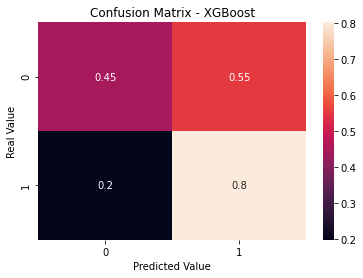

In [59]:
xgb = XGBClassifier(max_depth=3, learning_rate=0.0001, n_estimators=50, gamma=1, min_child_weight=6)
xgb.fit(X_train_rus, y_train_rus)

# prediction
X_test_xgb = scaler.transform(X_test)
y_pred_xgb = xgb.predict(X_test_xgb)

# classification report
print(classification_report(y_test, y_pred_xgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - XGBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.91      0.60      0.72      8771
           1       0.25      0.69      0.36      1665

    accuracy                           0.61     10436
   macro avg       0.58      0.64      0.54     10436
weighted avg       0.80      0.61      0.67     10436



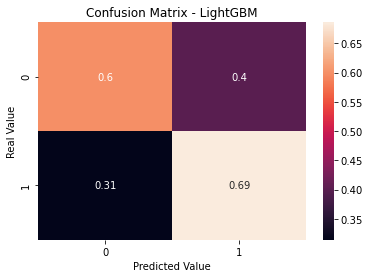

In [60]:
# final LightGBM model
lgb = LGBMClassifier(num_leaves=70, max_depth=5, learning_rate=0.01, min_data_in_leaf=400)
lgb.fit(X_train_rus, y_train_rus)

# prediction
X_test_lgb = scaler.transform(X_test)
y_pred_lgb = lgb.predict(X_test_lgb)

# classification report
print(classification_report(y_test, y_pred_lgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - LightGBM')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      8771
           1       0.26      0.65      0.37      1665

    accuracy                           0.65     10436
   macro avg       0.58      0.65      0.56     10436
weighted avg       0.80      0.65      0.70     10436



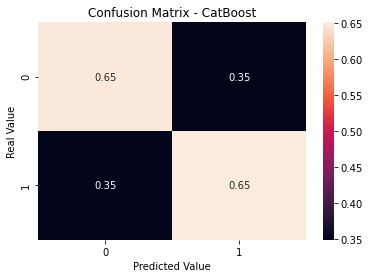

In [61]:
# final CatBoost model
cb = CatBoostClassifier(learning_rate=0.03, depth=6, l2_leaf_reg=5, logging_level='Silent')
cb.fit(X_train_rus, y_train_rus)

# prediction
X_test_cb = scaler.transform(X_test)
y_pred_cb = cb.predict(X_test_cb)

# classification report
print(classification_report(y_test, y_pred_cb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_cb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - CatBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

Among the three Gradient Boosting Algorithms tested, XGBoost yielded the best results, with a recall rate of 81%, although it delivered an undesired 55% of false positives. On the other hand, LightGBM and CatBoost delivered a better count of false positives, with 40% and 35% respectively, but their false negatives were substantially higher than that of XGBoost, resulting in a weaker recall rate.